In [78]:
#I PICKED THE EXERCISE ABOUT FINDING INFO REGARDING DIFFRENT
#JOB OPPORTUNITIES WITHIN PROGRAMMING LANGUAGES ON JOBINDEX
#if you want to see the description it can be found below
#https://docs.google.com/spreadsheets/d/1sxKJcpXv_pm85o-XCNxnoSg28xmDeqyGKA_I_9ILkeg/edit#gid=0


#Fetch data about python and a language of your choice
import requests

url = "https://www.jobindex.dk/jobsoegning?q="

languages = ["javascript", "python", "java", "html", "css"]

content_of_pages = [requests.get(f"{url}{l}") for l in languages]


In [79]:
import bs4
import re

#Converting the pages into a readable dictionary where you can see how many jobs there are

def region_amount_list(l):
    res = []
    for content in l:
        #loading content into bs4
        soup = bs4.BeautifulSoup(content.text, 'html.parser')
      
        #finding everything inside #id areas
        areas = soup.findAll("div", {"id":"areas"})
   
        #making a regex object for retrieving region and amount groups
        region_amount = re.compile(r" *([a-zA-ZæøåÆØÅ ]+).*>(\d+)")
    
        #using the object to append the 2 groups in a dict
        regions = dict(region_amount.findall(str(areas)))

        #removing the total/"Danmark"
        del regions["Danmark"]
        
        #converting string values into ints
        regions = {k : int(v) for k,v in regions.items()}
        
        res.append(regions)
    return res

<IPython.core.display.Javascript object>


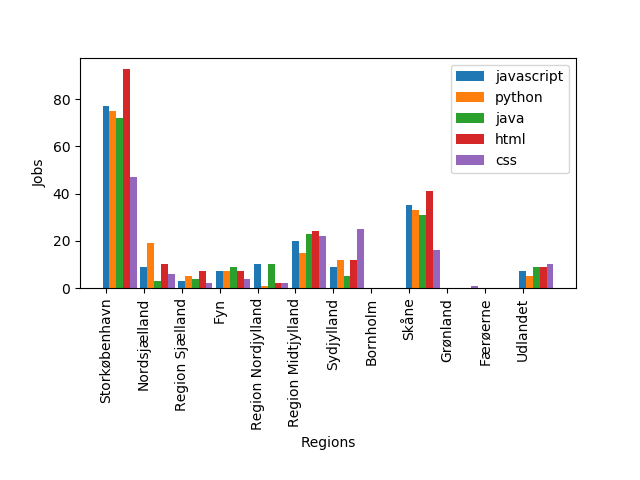

In [80]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

region_amounts = region_amount_list(content_of_pages)

fig, ax = plt.subplots()
width = (0.9/len(languages))
ind = np.arange(len(region_amounts[0]))


for k, language in enumerate(languages):
    region_amount = region_amounts[k]
    
    bar_plot = ax.bar(ind + (k * width), region_amount.values(),width)


    
ax.legend(languages)
ax.set_xlabel("Regions")
ax.set_ylabel("Jobs")
labels = list(region_amounts[0].keys())
plt.xticks(list(ind),labels)
plt.xticks(rotation="90")
plt.subplots_adjust(bottom=0.4)